# Motion Tracking

In [2]:
# Import packages
import cv2
import sys

import numpy as np # linear algebra
import matplotlib.pyplot as plt
%matplotlib inline

We have some code available, works quite nicely, but we will try bit harder to come up with nice tracking. Afterwards we return to this code and try to make it better.

In [4]:
if __name__ == '__main__' :
 
    # Set up tracker.
    # Instead of MIL, you can also use
    # BOOSTING, KCF, TLD, MEDIANFLOW or GOTURN
     
    tracker = cv2.TrackerMIL_create()
 
    # Read video
    video = cv2.VideoCapture("videos/seagull.mp4")
 
    # Exit if video not opened.
    if not video.isOpened():
        print ("Could not open video")
        sys.exit()
 
    # Read first frame.
    ok, frame = video.read()
    if not ok:
        print ('Cannot read video file')
        sys.exit()
     
    #Define an initial bounding box
    bbox = (126, 23, 188, 164)
    
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
 
    # Uncomment the line below to select a different bounding box
    # bbox = cv2.selectROI("Tracking", frame, fromCenter = False, showCrosshair = False)
 
    # Initialize tracker with first frame and bounding box
    ok = tracker.init(frame, bbox)
     
    i = 0;
    frame_avg = np.zeros_like(frame)
    while True:
        
        while i <= 5:
            # Read a new frame
            ok, frame = video.read()
            if not ok or frame is None:
                break
            frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
            frame_avg += frame
            i += 1
            
            
        frame = frame_avg / i
        frame = frame.astype(np.uint8)
        i = 0
         
        # Update tracker
        ok, bbox = tracker.update(frame)
 
        # Draw bounding box
        if ok:
            p1 = (int(bbox[0]), int(bbox[1]))
            p2 = (int(bbox[0] + bbox[2]), int(bbox[1] + bbox[3]))
            cv2.rectangle(frame, p1, p2, (0,0,255))
 
        # Display result
        cv2.imshow("Tracking", frame)
 
        # Exit if ESC pressed
        k = cv2.waitKey(1) & 0xff
        if k == 27 : break
    cv2.destroyAllWindows()

C:\Users\MartinH.PHARPCMORPHWK1\Miniconda2\envs\py36\lib\site-packages\ipykernel_launcher.py:48: RuntimeWarning: divide by zero encountered in true_divide
C:\Users\MartinH.PHARPCMORPHWK1\Miniconda2\envs\py36\lib\site-packages\ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in true_divide


KeyboardInterrupt: 

## Improve tracking

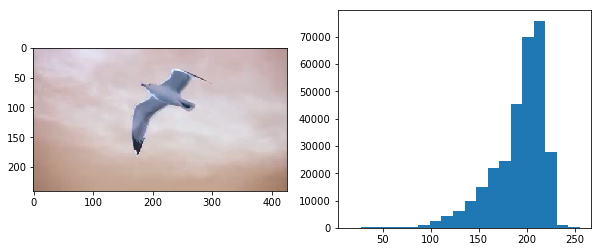

In [2]:
# Read video
video = cv2.VideoCapture("videos/seagull.mp4")
# Read first frame.
ok, frame = video.read()

# Check histogram to see if you can threshold
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (10, 4))
ax1.imshow(frame, cmap = 'bone')
_ = ax2.hist(frame.ravel(), 20)

In [3]:
bbox = cv2.selectROI("Tracking", frame, fromCenter = False, showCrosshair = False)
cv2.destroyAllWindows()

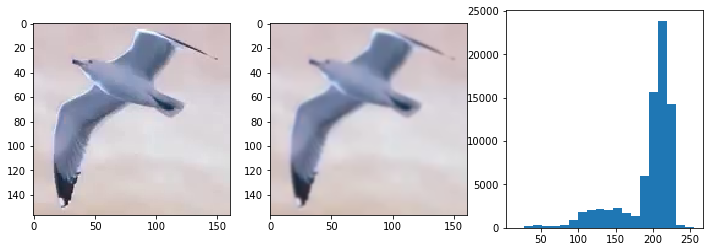

In [21]:
from skimage.filters import gaussian
frame_roi = frame[bbox[1]: int(bbox[1] + bbox[3]), bbox[0]: int(bbox[0] + bbox[2])]
frame_roi_filt = gaussian(frame_roi, sigma = 1, multichannel = True)
# Check histogram to see if you can threshold
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize = (12, 4))
ax1.imshow(frame_roi)
ax2.imshow(frame_roi_filt)
_ = ax3.hist(frame_roi.ravel(), 20)

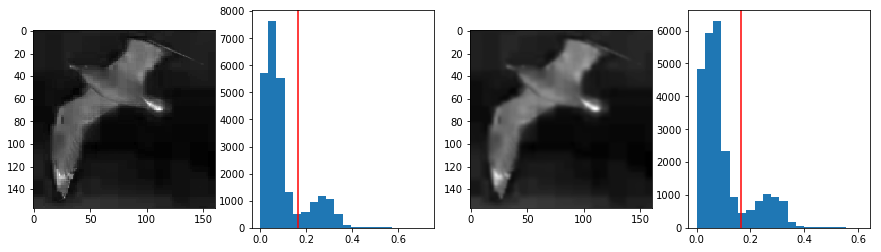

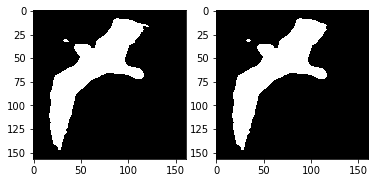

In [48]:
from skimage.color import convert_colorspace
from skimage.filters import gaussian
from skimage.filters import threshold_otsu
from skimage.morphology import binary_closing, binary_opening

frame_hsv = convert_colorspace(frame, "RGB", "HSV")
frame_roi = frame_hsv[bbox[1]: int(bbox[1] + bbox[3]), bbox[0]: int(bbox[0] + bbox[2]), 1]
frame_roi_filt = gaussian(frame_roi, sigma = 1, multichannel = False)

thresh = threshold_otsu(frame_roi_filt);
binary = frame_roi_filt > thresh

# Check histogram to see if you can threshold
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1,4, figsize = (15, 4))
ax1.imshow(frame_roi, cmap = 'gray')
_ = ax2.hist(frame_roi.ravel(), 20)
ax2.axvline(thresh, color='r')
ax3.imshow(frame_roi_filt, cmap = 'gray')
_ = ax4.hist(frame_roi_filt.ravel(), 20)
ax4.axvline(thresh, color='r')
n

binary_open = binary_opening(binary)
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (6, 4))
ax1.imshow(binary, cmap=plt.cm.gray)
ax2.imshow(binary_open, cmap=plt.cm.gray)

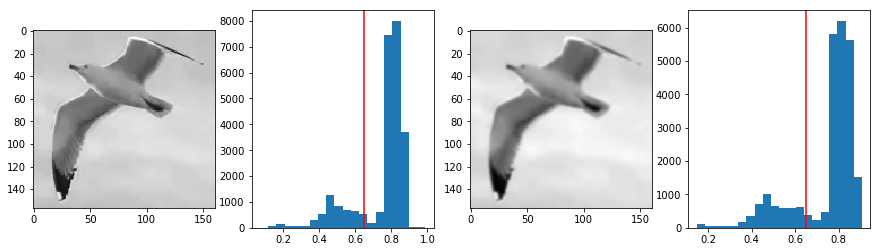

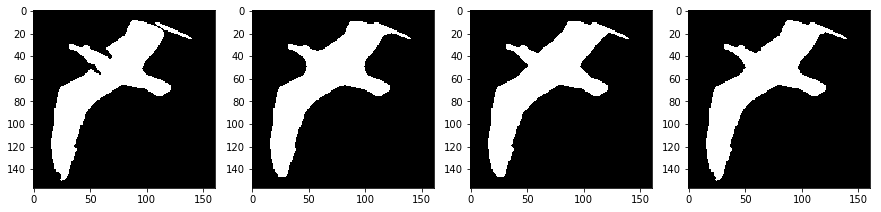

In [60]:
from skimage.color import rgb2gray
from skimage.filters import gaussian
from skimage.filters import threshold_otsu
from skimage.morphology import binary_closing, disk, diamond, square, star

frame_gray = rgb2gray(frame)
frame_roi = frame_rgb[bbox[1]: int(bbox[1] + bbox[3]), bbox[0]: int(bbox[0] + bbox[2])]

frame_roi_filt = gaussian(frame_roi, sigma = 1, multichannel = False)

thresh = threshold_otsu(frame_roi_filt);
binary = frame_roi_filt < thresh

# Check histogram to see if you can threshold
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1,4, figsize = (15, 4))
ax1.imshow(frame_roi, cmap = 'gray')
_ = ax2.hist(frame_roi.ravel(), 20)
ax2.axvline(thresh, color='r')
ax3.imshow(frame_roi_filt, cmap = 'gray')
_ = ax4.hist(frame_roi_filt.ravel(), 20)
ax4.axvline(thresh, color='r')


fig, (ax1, ax2, ax3, ax4) = plt.subplots(1,4, figsize = (15, 4))
ax1.imshow(binary, cmap=plt.cm.gray)

selem = disk(10)
binary_closed = binary_closing(binary, selem)
ax2.imshow(binary_closed, cmap=plt.cm.gray)

selem = diamond(10)
binary_closed = binary_closing(binary, selem)
ax3.imshow(binary_closed, cmap=plt.cm.gray)

# selem = square(10)
# binary_closed = binary_closing(binary, selem)
# ax4.imshow(binary_closed, cmap=plt.cm.gray)

selem = star(4)
binary_closed = binary_closing(binary, selem)
ax4.imshow(binary_closed, cmap=plt.cm.gray)

Ok, it looks like the star does a nice job. We can now find center of mass of the object:

In [67]:
selem = diamond(10)
binary_closed = binary_closing(binary, selem)

from skimage.measure import label, regionprops

binary_label = label(binary_closed)
binary_props = regionprops(binary_label)

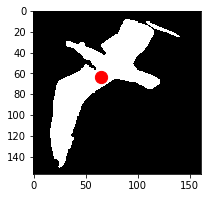

In [75]:
fig, ax1 = plt.subplots(1,1, figsize = (3, 4))
ax1.imshow(binary, cmap=plt.cm.gray)
ax1.scatter(binary_props[0].centroid[0], binary_props[0].centroid[1], s = 150, c = 'red', marker = 'o')

***
# Getting real dimensions from pixel coordinates

In [193]:
# Import packages
from scipy.spatial import distance as dist
import numpy as np
import cv2
import matplotlib.pyplot as plt
import imutils
from skimage import exposure
%matplotlib inline

First we define some useful functions. They come from pyimagesearch.com blog which has many useful recipes.

In [194]:
def order_points(pts, ratio = 1):
    '''
    Function to put points of bounding box in clockwise order
    '''
    # sort the points based on their x-coordinates
    xSorted = pts[np.argsort(pts[:, 0]), :]
    
    # grab the left-most and right-most points from the sorted
    # x-roodinate points
    leftMost = xSorted[:2, :]
    rightMost = xSorted[2:, :]
    
    # now, sort the left-most coordinates according to their
    # y-coordinates so we can grab the top-left and bottom-left
    # points, respectively
    leftMost = leftMost[np.argsort(leftMost[:, 1]), :]
    (tl, bl) = leftMost

    # now that we have the top-left coordinate, use it as an
    # anchor to calculate the Euclidean distance between the
    # top-left and right-most points; by the Pythagorean
    # theorem, the point with the largest distance will be
    # our bottom-right point
    D = dist.cdist(tl[np.newaxis], rightMost, "euclidean")[0]
    (br, tr) = rightMost[np.argsort(D)[::-1], :]
    
    # return the coordinates in top-left, top-right,
    # bottom-right, and bottom-left order
    return np.array([tl, tr, br, bl], dtype="float32") * ratio

def sort_contours(cnts, method="left-to-right"):
    '''
    Function to sort contours and assign bboxes
    '''
    # initialize the reverse flag and sort index
    reverse = False
    i = 0
    
    # handle if we need to sort in reverse
    if method == "right-to-left" or method == "bottom-to-top":
        reverse = True
    
    # handle if we are sorting against the y-coordinate rather than
    # the x-coordinate of the bounding box
    if method == "top-to-bottom" or method == "bottom-to-top":
        i = 1
 
    # construct the list of bounding boxes and sort them from top to
    # bottom
    boundingBoxes = [cv2.boundingRect(c) for c in cnts]
    (cnts, boundingBoxes) = zip(*sorted(zip(cnts, boundingBoxes),
    key=lambda b:b[1][i], reverse=reverse))
    
    # return the list of sorted contours and bounding boxes
    return (cnts, boundingBoxes)


def four_point_transform(image, pts):
    # obtain a consistent order of the points and unpack them
    # individually
    rect = order_points(pts)
    (tl, tr, br, bl) = rect
    
    # compute the width of the new image, which will be the
    # maximum distance between bottom-right and bottom-left
    # x-coordiates or the top-right and top-left x-coordinates
    widthA = np.sqrt(((br[0] - bl[0]) ** 2) + ((br[1] - bl[1]) ** 2))
    widthB = np.sqrt(((tr[0] - tl[0]) ** 2) + ((tr[1] - tl[1]) ** 2))
    maxWidth = max(int(widthA), int(widthB))

    # compute the height of the new image, which will be the
    # maximum distance between the top-right and bottom-right
    # y-coordinates or the top-left and bottom-left y-coordinates
    heightA = np.sqrt(((tr[0] - br[0]) ** 2) + ((tr[1] - br[1]) ** 2))
    heightB = np.sqrt(((tl[0] - bl[0]) ** 2) + ((tl[1] - bl[1]) ** 2))
    maxHeight = max(int(heightA), int(heightB))

    # now that we have the dimensions of the new image, construct
    # the set of destination points to obtain a "birds eye view",
    # (i.e. top-down view) of the image, again specifying points
    # in the top-left, top-right, bottom-right, and bottom-left
    # order
    dst = np.array([[0, 0],
                    [maxWidth - 1, 0],
                    [maxWidth - 1, maxHeight - 1],
                    [0, maxHeight - 1]], dtype = "float32")

    # compute the perspective transform matrix and then apply it
    M = cv2.getPerspectiveTransform(rect, dst)
    warped = cv2.warpPerspective(image, M, (maxWidth, maxHeight))

    # return the warped image
    return warped

In [195]:
# Read Image and force size. Save scaling ratio
image = cv2.imread("videos/skewedTable.jpg")
hght = 800
ratio = image.shape[0] / hght
image = imutils.resize(image, height = hght)

# convert it to grayscale, and blur it slightly
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray_sharp = gray.copy()
# Note that sigma and ksize are scale dependent!!! 
gray = cv2.GaussianBlur(gray, ksize = (7, 7), sigmaX = 0)
#gray = cv2.bilateralFilter(gray, d = 11, sigmaColor = 17, sigmaSpace = 17)

Next, we ponder about what we actually want to do. Ideally we would:
1. Transform the image for the view from top (for this you need 4 corners)
2. Run houghTransform to find circles (easier on image seen from top) (this doesnt work as we have ellipses)
3. Use known circle diameter to get scale
4. Also obtain projection matrix so that we don't need to transform each image in video, just distances.

# Projective + Affine Transform
In this code we first apply projective transform to get a rectangular roi from the image. We than apply affine transform to get final estimate of the undistored shape.
## Projective Transform

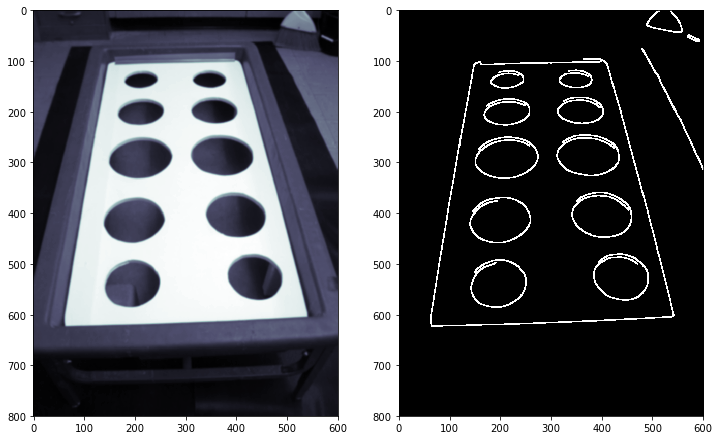

In [196]:
# perform edge detection, then perform a dilation + erosion to
# close gaps in between object edges
kernel = cv2.getStructuringElement(cv2.MORPH_RECT,(3,3))
edged = cv2.Canny(gray, threshold1 = 100, threshold2 = 200)
edged = cv2.dilate(edged, kernel = kernel, iterations=1)
#edged = cv2.erode(edged, kernel = None, iterations=1)

# Visualize the result
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (12, 12))
ax1.imshow(gray, cmap = 'bone')
ax2.imshow(edged, cmap = 'bone')
plt.show()

In [197]:
# find contours in the edge map
cnts = cv2.findContours(edged.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[1] # Pick second element of list, dunno really what other hold
 
# sort the contours from left-to-right and initialize the bounding box
# point colors
#(cnts, _) = sort_contours(cnts) # Sort contour by the size of the bbox in decreasing order
cnts = sorted(cnts, key = cv2.contourArea, reverse = True)[:10] # This should also work
colors = ((0, 0, 255), (240, 0, 159), (255, 0, 0), (255, 255, 0))

The contour was approximated by shape with 4 corners. Do you have sought rectangle? True


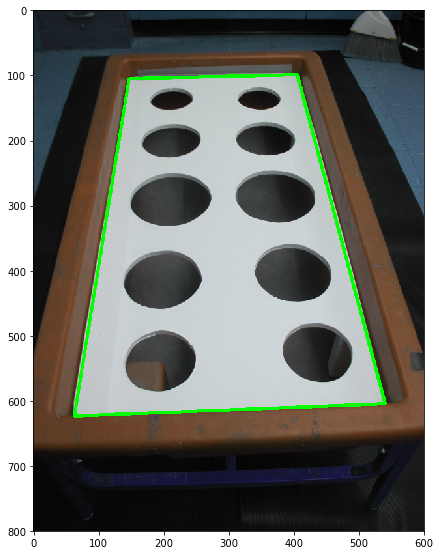

In [198]:
cntMax = cnts[0] # get biggest contour from top of the sorted stack
# Get perimeter length
peri = cv2.arcLength(cntMax, closed = True)
# Approximate the shape 
approxRect = cv2.approxPolyDP(cntMax, epsilon = 0.02 * peri, closed = True)
print("The contour was approximated by shape with {} corners. Do you have sought rectangle? {}"
      .format(len(approxRect), len(approxRect) == 4))

# Visualize result
imageVis = image.copy() # preserve working image
cv2.drawContours(imageVis, [approxRect], contourIdx = -1, color = (0, 255, 0), thickness =  3)
# Debug
# cv2.circle(imageVis, tuple(bl), radius = 10, color = (0, 0, 255), thickness = 4)

# cv2.imshow("Skewed boundary", imageVis)
# # Esc kills the window
# if cv2.waitKey(0) & 0xff == 27:
#     cv2.destroyAllWindows()

fig,ax = plt.subplots(1,1, figsize=(7,10))
ax.imshow(imageVis)
plt.show()

In [199]:
# apply the four point tranform to obtain a "birds eye view" of the image
pts = approxRect.reshape(4,2) # remove superfluous dimension
warped = four_point_transform(gray_sharp, pts) # apply transformation
 
# show the original and warped images
cv2.imshow("Original", gray_sharp)
cv2.imshow("Warped", warped)
# Esc kills the window
if cv2.waitKey(0) & 0xff == 27:
    cv2.destroyAllWindows()

Ok, now we have an image with more or less 'bird's eye view'. We probably don't have more information to get better reconstruction.

Next, my idea is to fit elipses to our view of circles and then fit a minima enclosing circle. This should give me the true size object as if osberved from above.
## Affine transform

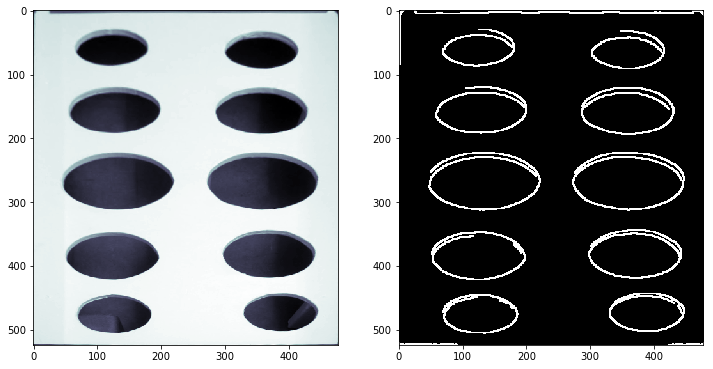

In [200]:
# perform edge detection, then perform a dilation + erosion to
# close gaps in between object edges
kernel = cv2.getStructuringElement(cv2.MORPH_RECT,(3,3))
warped_edged = cv2.Canny(warped, threshold1 = 150, threshold2 = 212)
warped_edged = cv2.dilate(warped_edged, kernel = None, iterations=1)
#edged = cv2.erode(edged, kernel = None, iterations=1)

# Visualize the result
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (12, 12))
ax1.imshow(warped, cmap = 'bone')
ax2.imshow(warped_edged, cmap = 'bone')
plt.show()

In [201]:
#find contours in the edge map
_, cnts, _ = cv2.findContours(warped_edged.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
# explicit copy for visualization
warpedVis = warped.copy()

# Fit ellipse to each contour
ellipList = []
for i, c in enumerate(cnts):
    ellip = cv2.fitEllipse(c)
    (cX, cY), (minAx, majAx), ang = ellip
    # Get aspect ratio
    aspRat = majAx / minAx
    # You dont want shapes that are too small or too tilted
    if cv2.contourArea(c) < 100 or ang < 75 or ang > 115:
        continue
    # Append to list
    ellipList.append([ellip, aspRat, ang, c])
# Use apriori knowledge on number of sought objects
numObjs = 10
# Sort the list on aspect ratio and keep only as many objects as you expect
ellipList = sorted(ellipList, key = lambda e: e[1], reverse = False)[:numObjs]

# Visualize
for ellip in ellipList:
    ellip = ellip[0]
    # draw the contour
    # cv2.drawContours(warpedVis, [c], contourIdx = 0, color = (0,255,0), thickness = 2)
    cv2.ellipse(warpedVis, ellip, color = (0, 255, 0), thickness = 2)
    cv2.circle(warpedVis, (np.int(ellip[0][0]), np.int(ellip[0][1])), radius = 2, color = (255, 0, 0), thickness = 2)

# cv2.imshow('Detected ellipses',warpedVis)
# # Esc kills the window
# if cv2.waitKey(0) & 0xff == 27:
#     cv2.destroyAllWindows()
print("We have {} ellipses with average aspect ratio {:0.2f}.".format(len(ellipList), np.mean([x[1] for x in ellipList])))

We have 10 ellipses with average aspect ratio 1.95.


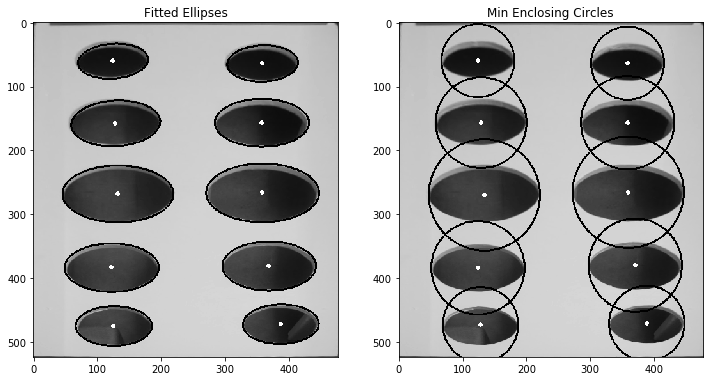

In [202]:
# Go back, take the corresponding contours and fit minimum enclosing circles
warpedVis2 = warped.copy()
for i, ellip in enumerate (ellipList) :
    cont = ellip[3]
    c, r = cv2.minEnclosingCircle(cont)
    # print((np.int(c[0]), np.int(c[1])), np.int(r))
    cv2.circle(warpedVis2, center = (np.int(c[0]), np.int(c[1])), radius = np.int(r), color = (0,255,0), thickness = 2)
    cv2.circle(warpedVis2, center = (np.int(c[0]), np.int(c[1])), radius = 2, color = (255,0,0), thickness = 2)
    
    
# Visualize
# cv2.imshow('detected circles',warpedVis)
# # Esc kills the window
# if cv2.waitKey(0) & 0xff == 27:
#     cv2.destroyAllWindows()

fig, ax = plt.subplots(1,2, figsize = (12, 12))
ax[0].imshow(warpedVis, cmap = "gray")
ax[0].set_title("Fitted Ellipses")
ax[1].imshow(warpedVis2, cmap = "gray")
ax[1].set_title("Min Enclosing Circles")
plt.show()

At this point you can pick a desired circle and use its major axes length to calibrate your measurements

In [11]:
# # Can I do just:
# scaleX = measuredX / majAx
# scaleY = measuredY / minAx
# dist = np.sqrt((dx*scaleX)**2 + (dy*scaleY)**2)

In [203]:
# Get an ellipse and corresponding circle that give maximal Area
# For no particular reason, just need one
maxEllip = sorted(ellipList, key = lambda e: e[0][1][1] * e[0][1][0], reverse = True)[0]
maxC, maxR =  cv2.minEnclosingCircle(maxEllip[3])
majAx = maxEllip[0][1][1]
minAx = maxEllip[0][1][0]
# One option how to draw patches on original image
warpedVis3 = warped.copy();
cv2.ellipse(warpedVis3, maxEllip[0], color = (0, 255, 0), thickness = 2)
cv2.circle(warpedVis3, (np.int(maxEllip[0][0][0]), np.int(maxEllip[0][0][1])), radius = 2, color = (255, 0, 0), thickness = 2)

array([[ 48,  58,  68, ...,  40,  36,  34],
       [ 55,  66,  78, ...,  57,  45,  36],
       [ 60,  74,  88, ...,  72,  52,  41],
       ..., 
       [169, 191, 192, ..., 188, 182, 140],
       [132, 181, 186, ..., 182, 175, 129],
       [ 62,  67,  72, ...,  80,  74,  66]], dtype=uint8)

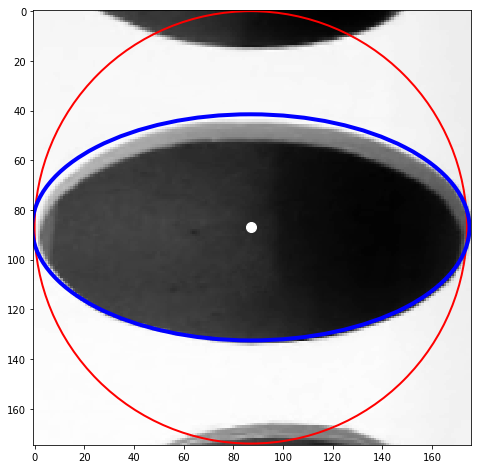

In [204]:
# Another option how to draw patches on image
import matplotlib.patches as mpatches

# The dimensions are y, x -.-
roi = (np.int(maxC[0] - maxR),  np.int(maxC[0] + maxR), np.int(maxC[1]- maxR), np.int(maxC[1] + maxR))
# Pull out the roi
warpedVis3 = warped[roi[2]:roi[3], roi[0]:roi[1]]

#Add circle, centre, ellipse over the image
fig, ax = plt.subplots(1, 1, figsize = (10, 8))
ax.imshow(warpedVis3, cmap = "gray", alpha = 1)
circle = plt.Circle((np.int(maxR), np.int(maxR)), radius = np.int(maxR), fill = False, color = "r",
                       linewidth = 2)
ellipse = mpatches.Ellipse((np.int(maxR), np.int(maxR)), np.int(minAx), np.int(majAx), angle = maxEllip[0][2],
                             fill = False, color = "b", linewidth = 4)
ax.scatter(np.int(maxR), np.int(maxR), s = 100, c = "w", marker = "o")
ax.add_artist(circle)
ax.add_artist(ellipse)
plt.show()

In [ ]:
# Get three points that should map onto each other after affine transformation 
# pts1 = np.float32([list(maxC), [maxC[0] + maxR, maxC[1]], [maxC[0], maxC[1] + maxR]])
# pts2 = np.float32([list(maxEllip[0][0]), [maxEllip[0][0][0] + majAx / 2, maxEllip[0][0][1]],
#                    [maxEllip[0][0][0], maxEllip[0][0][1] + minAx / 2]])

In [221]:
# get angle and convert to radians
ang = (90 - maxEllip[0][2]) * (2*np.pi / 360)
# Get directional shifts
xshift = np.sin(ang) * (majAx / 2)
yshift = -np.sin(ang) * (minAx / 2)

# Get the outter points
if maxEllip[0][0][0] > warpedVis3.shape[1] / 2: 
    pt1 = [maxC[0] + maxR, maxC[1]]
    pt2 = [maxEllip[0][0][0] + majAx / 2, maxEllip[0][0][1] + yshift]
else:
    pt1 = [c[0] - r, c[1]]
    pt2 = [maxEllip[0][0][0] - majAx / 2, maxEllip[0][0][1] - yshift]

# Plot circle points
pts1 = np.float32([list(maxC),
                   pt1,
                   [maxC[0], maxC[1] + maxR]])

# Plot ellipse points
pts2 = np.float32([list(maxEllip[0][0]),
                   pt2,
                   [maxEllip[0][0][0] + xshift, maxEllip[0][0][1] + minAx / 2]])

# Sanity check
# fig, ax = plt.subplots(1,1, figsize = (4,4))
# ax.scatter([x[0] for x in pts1], [y[1] for y in pts1], color = "r")
# ax.scatter([x[0] for x in pts2], [y[1] for y in pts2], color = "b")
# plt.show()

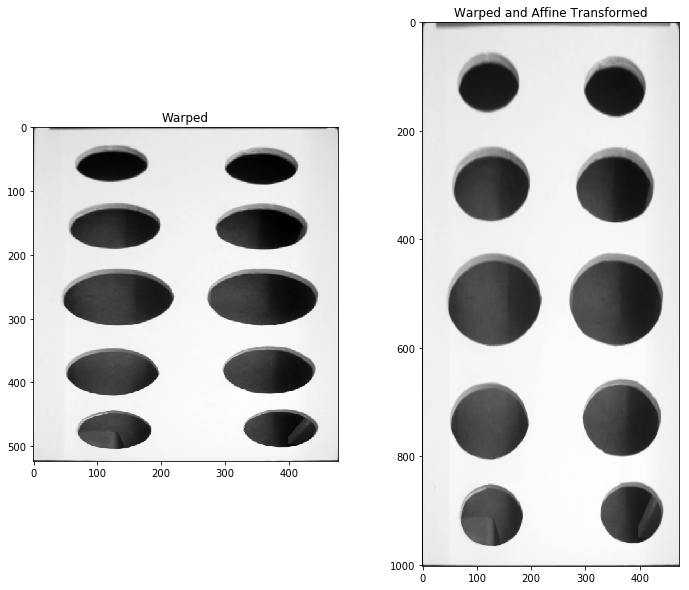

In [219]:
# This should be basically just uniaxial stretch
M = cv2.getAffineTransform(pts2, pts1)
# Get shape of initial image
rows, cols = warped.shape
# Hardcode shift to 0. Ideally would happen automatically, but currently doesnt. Why?
M[:,2] = 0
# Round to reasonable precision
M = np.round(M, decimals = 3)
# Apply transform and enlarge the output image as expected
dst = cv2.warpAffine(warped, M, (np.int(cols*M[0,0]), np.int(rows*M[1,1])))

fig, ax = plt.subplots(1,2, figsize = (12, 10))
ax[0].imshow(warped, cmap = "gray")
ax[0].set_title("Warped")
ax[1].imshow(dst, cmap = "gray")
ax[1].set_title("Warped and Affine Transformed")
plt.show()

### Now just get circle contours

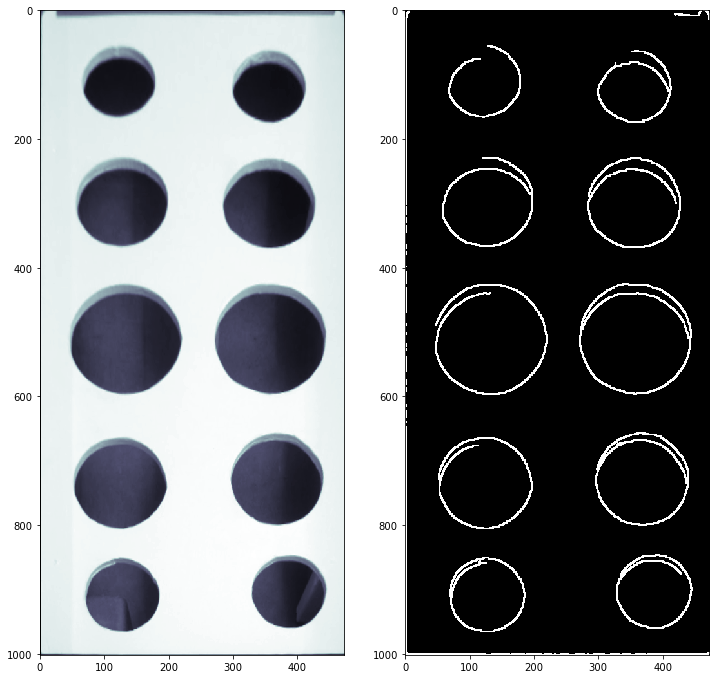

In [227]:
# perform edge detection, then perform a dilation + erosion to
# close gaps in between object edges
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(9,9))
dst_edged = cv2.Canny(dst, threshold1 = 100, threshold2 = 250)
dst_edged = cv2.dilate(dst_edged, kernel = None, iterations=1)
#edged = cv2.erode(edged, kernel = None, iterations=1)

# Visualize the result
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (12, 12))
ax1.imshow(dst, cmap = 'bone')
ax2.imshow(dst_edged, cmap = 'bone')
plt.show()

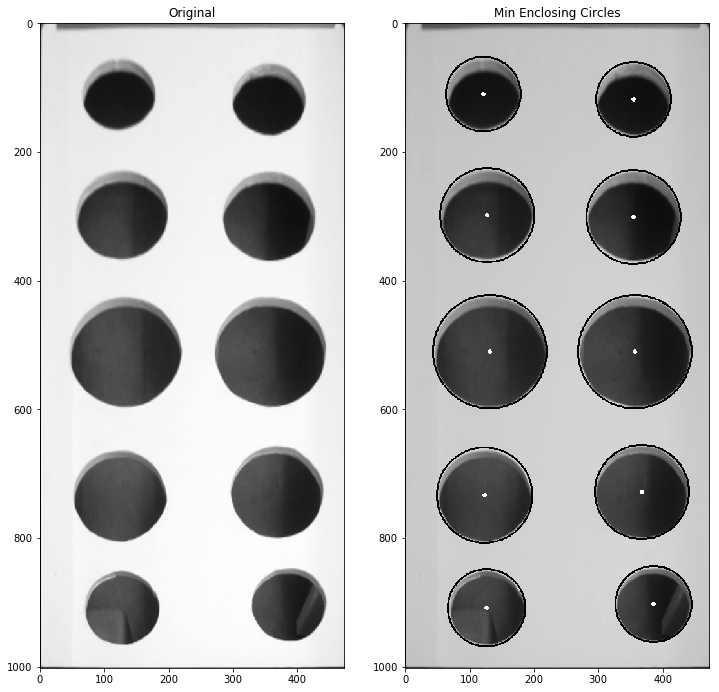

In [232]:
#find contours in the edge map
# cv2.RETR_EXTERNAL gets external boundaries only :)
# In this particular case it may be enough, but the full-fledged approach works as well
im2, cnts, hiearchy = cv2.findContours(dst_edged.copy(), cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)
# explicit copy for visualization
dstVis = dst.copy()

# Drop all contours that have no parent (these should be external contours)
# http://docs.opencv.org/trunk/d9/d8b/tutorial_py_contours_hierarchy.html
#cnts = [cnt for (cnt, h) in zip(cnts, hiearchy[0]) if h[3] != -1]

# Loop over contours and hiearchies simultaneously
circList = []
for i, (c, h) in enumerate(zip(cnts, hiearchy[0])):
    # Drop conours that are too small, cannot be fitted with ellipse, or have a parent
    if cv2.contourArea(c, oriented = False) < 500 or len(c) < 5 or h[3] != -1:
        continue
    # Fit ellipse to the contour
    c, r = cv2.minEnclosingCircle(c)
    # Drop circle around residual external edge of the frame
    if r > np.int(dstVis.shape[1] / 2):
        continue
    # Append to list
    circList.append([c, r])

for i, circ in enumerate (circList) :
    c, r = circ
    cv2.circle(dstVis, center = (np.int(c[0]), np.int(c[1])), radius = np.int(r), color = (0,255,0), thickness = 2)
    cv2.circle(dstVis, center = (np.int(c[0]), np.int(c[1])), radius = 2, color = (255,0,0), thickness = 2)
    
    
# Visualize
# cv2.imshow('detected circles',warpedVis)
# # Esc kills the window
# if cv2.waitKey(0) & 0xff == 27:
#     cv2.destroyAllWindows()

fig, ax = plt.subplots(1,2, figsize = (12, 12))
ax[0].imshow(dst, cmap = "gray")
ax[0].set_title("Original")
ax[1].imshow(dstVis, cmap = "gray")
ax[1].set_title("Min Enclosing Circles")
plt.show()

In [234]:
# Take the biggest circle and its radius
r_pic = sorted(circList, key = lambda c: c[1], reverse = False)[0][1]
r_real = 50 # real diameter in mm
scale = r_pic / r_real
print("1 pixel corresponds to {:0.2f} mm".format(scale))

1 pixel corresponds to 1.17 mm


## Conclusion
Ok, this looks very nice. One thing is problematic - it relies of having a nice rectangular shape in the image. We probably will not have it!

This leads to the question: are we able to do this directly with projective transform?We should! We just need to fit circles and elipses in the original image!

## Just Projective Transform

In [238]:
# Read Image and force size. Save scaling ratio
image = cv2.imread("videos/skewedTable.jpg")
hght = 800
ratio = image.shape[0] / hght
image = imutils.resize(image, height = hght)

# convert it to grayscale, and blur it slightly
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [239]:
# Prompt for ROI to be analyzed
def selectROI(img):
    try:
        (c, r, w, h) = cv2.selectROI("SelectROI (Enter=confirm, Esc=exit", img, fromCenter = False, showCrosshair = False)
        # Esc kills the window
        if cv2.waitKey(0) & 0xff == 27:
            cv2.destroyAllWindows()
    finally:
        cv2.destroyAllWindows()
    # Store bounding box corners    
    pts = [[r, c], [r, c+w], [r+h, c], [r+h, c+w]]
    pts = order_points(np.asarray(pts))
    # Pull out roi
    roi = img[r:r+h, c: c+w]
    return pts, roi

# If necessary, can also skeletonize
def skeletonize(edged):
    size = np.size(edged)
    img = edged.copy()
    done = False
    skel = np.zeros(img.shape,np.uint8)

    while not done:
        eroded = cv2.erode(img, kernel)
        temp = cv2.dilate(eroded, kernel)
        temp = cv2.subtract(img, temp)
        skel = cv2.bitwise_or(skel, temp)
        img = eroded.copy()

        zeros = size - cv2.countNonZero(img)
        if zeros == size:
            done = True
    
    return skel

In [240]:
changeFlag = True
if changeFlag:
    pts, roi = selectROI(gray)
else:
    pts = np.array([[59., 78.],
           [622., 78.],
           [622., 545.],
           [59., 545.]], dtype = np.uint8)
    roi = gray[pts[0][0]:pts[1][0], pts[0][1]:pts[2][1]]

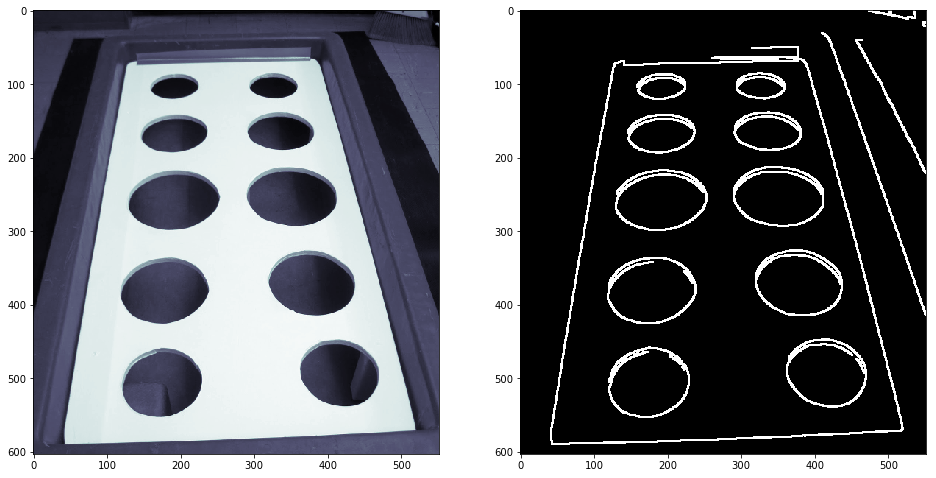

In [241]:
# perform edge detection, then perform a dilation + erosion to
# close gaps in between object edges
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(3,3))
edged = cv2.Canny(roi, threshold1 = 150, threshold2 = np.max(roi))
edged = cv2.dilate(edged, kernel = None, iterations=1)
#edged = cv2.erode(edged, kernel = None, iterations=1)

# Visualize the result
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (16, 16))
ax1.imshow(roi, cmap = 'bone')
ax2.imshow(edged, cmap = 'bone')
plt.show()

In [242]:
#find contours in the edge map
# cv2.RETR_EXTERNAL gets external boundaries only :)
im2, cnts, hiearchy = cv2.findContours(edged.copy(), cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)
# explicit copy for visualization
roiVis = roi.copy()

# Drop all contours that have no parent (these should be external contours)
# http://docs.opencv.org/trunk/d9/d8b/tutorial_py_contours_hierarchy.html
#cnts = [cnt for (cnt, h) in zip(cnts, hiearchy[0]) if h[3] != -1]

# Loop over contours and hiearchies simultaneously
ellipList = []
for i, (c, h) in enumerate(zip(cnts, hiearchy[0])):
    # Drop conours that are too small, cannot be fitted with ellipse, or have a parent
    if cv2.contourArea(c, oriented = False) < 500 or len(c) < 5 or h[3] != -1:
        continue
    # Fit ellipse to the contour
    ellip = cv2.fitEllipse(c)
    (cX, cY), (minAx, majAx), ang = ellip
    # Get aspect ratio
    aspRat = majAx / minAx
    # You dont want shapes that are too tilted or too skewed
    if ang < 75 or ang > 115 or aspRat > 2.5:
        continue
    # Append to list
    ellipList.append([ellip, aspRat, ang, c])
    
    
# Use apriori knowledge on number of sought objects
numObjs = 10
# Sort the list on aspect ratio and keep only as many objects as you expect
ellipList = sorted(ellipList, key = lambda e: e[1], reverse = False)[:numObjs]
#ellipList = [el for el in ellipList if el[4]  [p[0] for p in ellipList]]

# Visualize
for ellip in ellipList:
    ellip = ellip[0]
    # draw the contour
    # cv2.drawContours(warpedVis, [c], contourIdx = 0, color = (0,255,0), thickness = 2)
    cv2.ellipse(roiVis, ellip, color = (0, 255, 0), thickness = 2)
    cv2.circle(roiVis, (np.int(ellip[0][0]), np.int(ellip[0][1])), radius = 2, color = (255, 0, 0), thickness = 2)

# cv2.imshow('Detected ellipses', roiVis)
# # Esc kills the window
# if cv2.waitKey(0) & 0xff == 27:
#     cv2.destroyAllWindows()
print("We have {} ellipses with average aspect ratio {:0.2f}.".format(len(ellipList), np.mean([x[1] for x in ellipList])))

We have 10 ellipses with average aspect ratio 1.55.


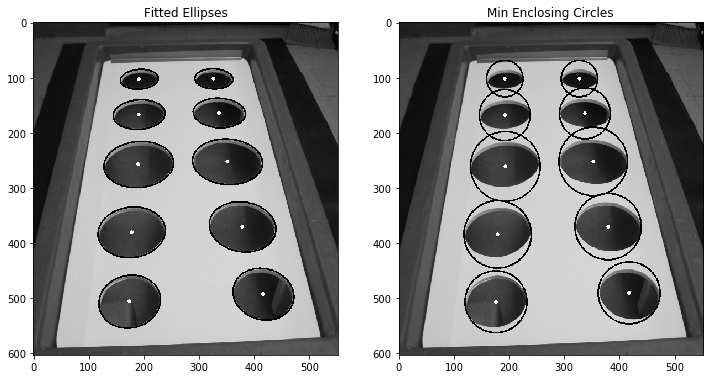

In [243]:
# Go back, take the corresponding contours and fit minimum enclosing circles
roiVis2 = roi.copy()
for i, ellip in enumerate (ellipList) :
    cont = ellip[3]
    c, r = cv2.minEnclosingCircle(cont)
    # print((np.int(c[0]), np.int(c[1])), np.int(r))
    cv2.circle(roiVis2, center = (np.int(c[0]), np.int(c[1])), radius = np.int(r), color = (0,255,0), thickness = 2)
    cv2.circle(roiVis2, center = (np.int(c[0]), np.int(c[1])), radius = 2, color = (255,0,0), thickness = 2)
    
    
# Visualize
# cv2.imshow('detected circles',warpedVis)
# # Esc kills the window
# if cv2.waitKey(0) & 0xff == 27:
#     cv2.destroyAllWindows()

fig, ax = plt.subplots(1,2, figsize = (12, 12))
ax[0].imshow(roiVis, cmap = "gray")
ax[0].set_title("Fitted Ellipses")
ax[1].imshow(roiVis2, cmap = "gray")
ax[1].set_title("Min Enclosing Circles")
plt.show()

What we should do next?

1. Find 4 points (3 of them not on a line) from these ellipses. http://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_geometric_transformations/py_geometric_transformations.html
2. Use these points to create projection matrix
3. Use the projection matrix to apply backTransform and obtain reconstructed bird's eye view image
4. Get dimensions from the bird's eye veiw and use them for scaling purposes for distance computation
5. Ask Ladina for videos
6. Celebrate

0.12700961449529596
-0.15205784296998173


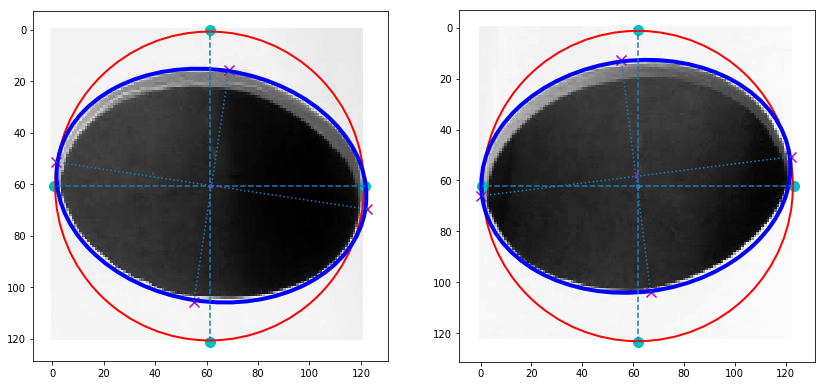

In [323]:
# Another option how to draw patches on image
import matplotlib.patches as mpatches
import matplotlib.lines as mlines

# Get an ellipse and corresponding circle that give maximal Area
maxEllips = sorted(ellipList, key = lambda e: e[0][1][1] * e[0][1][0], reverse = True)[0:2]
# Or get ellipses with the longest major axes
#maxEllips = sorted(ellipList, key = lambda e: e[0][1][1], reverse = True)[0:2]


fig, axs = plt.subplots(1, 2, figsize = (14, 8))
axs = axs[::-1] # Get view as in the image
for maxEllip, ax in zip (maxEllips, axs):
    
    # Pull out the contour
    contour = maxEllip[3]
    # Pull out the ellipse
    ellip = maxEllip[0]
    
    maxC, maxR =  cv2.minEnclosingCircle(contour)
    majAx = maxEllip[0][1][1]
    minAx = maxEllip[0][1][0]

    # The dimensions are y, x -.-
    box = (np.int(maxC[0] - maxR),  np.int(maxC[0] + maxR), np.int(maxC[1]- maxR), np.int(maxC[1] + maxR))
    # Pull out the roi
    roiVis3 = roi[box[2]:box[3], box[0]:box[1]]
    

    #Add circle, centre, ellipse over the image
    ax.imshow(roiVis3, cmap = "gray", alpha = 1)
    circle = plt.Circle((maxC[0] - box[0], maxC[1] - box[2]), radius = np.int(maxR), fill = False, color = "r", linewidth = 2)
    
    ellipse = mpatches.Ellipse((ellip[0][0] - box[0], ellip[0][1] - box[2]), np.int(minAx), np.int(majAx), angle = maxEllip[0][2],
                                 fill = False, color = "b", linewidth = 4)
    
    ax.scatter(maxC[0] - box[0], maxC[1] - box[2], s = 10, c = "c", marker = "o")
    ax.scatter(ellip[0][0] - box[0], ellip[0][1] - box[2], s = 10, c = "m", marker = "o")
    
    ax.add_artist(circle)
    ax.add_artist(ellipse)
    
    # get angle and convert to radians
    ang = (90 - ellip[2]) * (2*np.pi / 360)
    print(ang)
    # Get directional shifts
    xshift = np.sin(ang) * (minAx / 2)
    yshift = -np.sin(ang) * (majAx / 2)
    
#     # Get the outter points
#     if ellip[0][0] > roi.shape[1] / 2: 
#         pt1 = [maxC[0] + maxR, maxC[1]]
#         pt2 = [maxEllip[0][0][0] + majAx / 2, maxEllip[0][0][1] + yshift]
#     else:
#         pt1 = [maxC[0] - maxR, maxC[1]]
#         pt2 = [maxEllip[0][0][0] - majAx / 2, maxEllip[0][0][1] - yshift]
    
    # Plot circle points
    pts1 = np.float32([
                       [maxC[0] + maxR, maxC[1]],
                        [maxC[0] - maxR, maxC[1]],
                       [maxC[0], maxC[1] + maxR],
                        [maxC[0], maxC[1] - maxR]])
    ax.scatter(pts1[:, 0] - box[0], pts1[:,1] - box[2], s = 100, c = "c", marker = "o", label = "Circle Pts")
    
    # Plot ellipse points
    pts2 = np.float32([
                       [maxEllip[0][0][0] + majAx / 2, maxEllip[0][0][1] + yshift],
                        [maxEllip[0][0][0] - majAx / 2, maxEllip[0][0][1] - yshift],
                       [maxEllip[0][0][0] + xshift, maxEllip[0][0][1] + minAx / 2],
                        [maxEllip[0][0][0] - xshift, maxEllip[0][0][1] - minAx / 2]])
    ax.scatter(pts2[:, 0] - box[0], pts2[:,1] - box[2], s = 100, c = "m", marker = "x", label = "Ellipse Pts")
    
    linestyles = ['--', ':']
    for (ls, pts) in (zip(linestyles, [pts1, pts2])):
        majAx_line = mlines.Line2D(pts[0:2, 0] - box[0], pts[0:2,1] - box[2], linestyle = ls)
        minAx_line = mlines.Line2D(pts[2:4, 0] - box[0], pts[2:4,1] - box[2], linestyle = ls)
        ax.add_line(majAx_line)
        ax.add_line(minAx_line)
    
    # Debug - Show points we will use for matching
    # Need 4 points that should map onto each other after projective transformation 
#     pts1 = np.float32([list(maxC), [maxC[0] + maxR, maxC[1]], [maxC[0], maxC[1] + maxR]])
#     pts2 = np.float32([list(maxEllip[0][0]), [maxEllip[0][0][0] + majAx / 2, maxEllip[0][0][1]], [maxEllip[0][0][0], maxEllip[0][0][1] + minAx / 2]])
#     ax.scatter(pts1[:, 0] - box[2], pts1[:,1] - box[0], s = 100, c = "c", marker = "o", label = "Circle Pts")
#     ax.scatter(pts2[:, 0] - box[2], pts2[:,1] - box[0], s = 100, c = "m", marker = "x", label = "Ellipse Pts")

plt.show()
## You will probably need also the mirrored circle to capture the projectivness of the transform

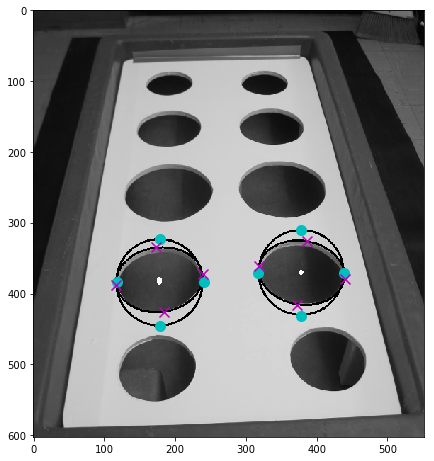

In [329]:
# Get an ellipse and corresponding circle that give maximal Area
maxEllips = sorted(ellipList, key = lambda e: e[0][1][1] * e[0][1][0], reverse = True)[0:2]
# Or get ellipses with the longest major axes
#maxEllips = sorted(ellipList, key = lambda e: e[0][1][1], reverse = True)[0:2]
# Create working copy
roiVis3 = roi.copy()
# Create List to store points for computing perspective transform matrix
pts = [] #np.ndarray((4, 2), dtype = np.float32) # unidstored points
pts_warp = [] # np.ndarray((4, 2), dtype = np.float32) # distorted points

# Loop over selected ellipses and plot
fig, ax = plt.subplots(1,1, figsize = (7,8))
#fig, axs = plt.subplots(1, 2, figsize = (14, 8))
#for maxEllip, ax in zip (maxEllips, axs):
for maxEllip in maxEllips:
    
    ellip = maxEllip[0]
    # draw the ellipse contour
    cv2.ellipse(roiVis3, ellip, color = (0, 255, 0), thickness = 2)
    # draw center
    cv2.circle(roiVis3, (np.int(ellip[0][0]), np.int(ellip[0][1])), radius = 2, color = (255, 0, 0), thickness = 2)
    # Get minimal enclosing circle
    cont = maxEllip[3]
    c, r = cv2.minEnclosingCircle(cont)
    # Draw the circle and its center
    cv2.circle(roiVis3, center = (np.int(c[0]), np.int(c[1])), radius = np.int(r), color = (0,255,0), thickness = 2)
    cv2.circle(roiVis3, center = (np.int(c[0]), np.int(c[1])), radius = 2, color = (255,0,0), thickness = 2)
    
    # Get major and minor axes
    majAx = ellip[1][1]
    minAx = ellip[1][0]
    
    # Debug - Show points we will use for matching
    # Need 4 points that should map onto each other after projective transformation
    # Is there smarter way how to get extremes of ellipse that is tilted?
    # May get rotated minimal rectangle but still need to find middle points.
    
    # get angle and convert to radians
    ang = (90 - ellip[2]) * (2*np.pi / 360)
    # Get directional shifts
    xshift = np.sin(ang) * (minAx / 2)
    yshift = -np.sin(ang) * (majAx / 2)
    
#     # Get the outter points
#     if ellip[0][0] > roiVis3.shape[1] / 2: 
#         pt1 = [c[0] + r, c[1]]
#         pt2 = [maxEllip[0][0][0] + majAx / 2, maxEllip[0][0][1] + yshift]
#     else:
#         pt1 = [c[0] - r, c[1]]
#         pt2 = [maxEllip[0][0][0] - majAx / 2, maxEllip[0][0][1] - yshift]
    
#     # Plot circle points
#     pts1 = np.float32([
#                        pt1,
#                        [c[0], c[1] + r]])
#     ax.scatter(pts1[:, 0], pts1[:,1], s = 100, c = "c", marker = "o", label = "Circle Pts")
    
#     # Plot ellipse points
#     pts2 = np.float32([
#                        pt2,
#                        [maxEllip[0][0][0] + xshift, maxEllip[0][0][1] + minAx / 2]])
#     ax.scatter(pts2[:, 0], pts2[:,1], s = 100, c = "m", marker = "x", label = "Ellipse Pts")


    # Plot circle points
    maxC = c; maxR = r; # intercompatibility
    pts1 = np.float32([
                       [maxC[0] + maxR, maxC[1]],
                        [maxC[0] - maxR, maxC[1]],
                       [maxC[0], maxC[1] + maxR],
                        [maxC[0], maxC[1] - maxR]])
    ax.scatter(pts1[:, 0], pts1[:,1], s = 100, c = "c", marker = "o", label = "Circle Pts")
    
    # Plot ellipse points
    pts2 = np.float32([
                       [maxEllip[0][0][0] + majAx / 2, maxEllip[0][0][1] + yshift],
                        [maxEllip[0][0][0] - majAx / 2, maxEllip[0][0][1] - yshift],
                       [maxEllip[0][0][0] + xshift, maxEllip[0][0][1] + minAx / 2],
                        [maxEllip[0][0][0] - xshift, maxEllip[0][0][1] - minAx / 2]])
    ax.scatter(pts2[:, 0], pts2[:,1], s = 100, c = "m", marker = "x", label = "Ellipse Pts")
    
    # Append points to lists, take only vertical points
    pts.append(pts1[2:4])
    pts_warp.append(pts2[2:4])
    
# Plot the image
ax.imshow(roiVis3, cmap = "gray", alpha = 1)
plt.show()

### Compute transformation matrix and apply its reverse

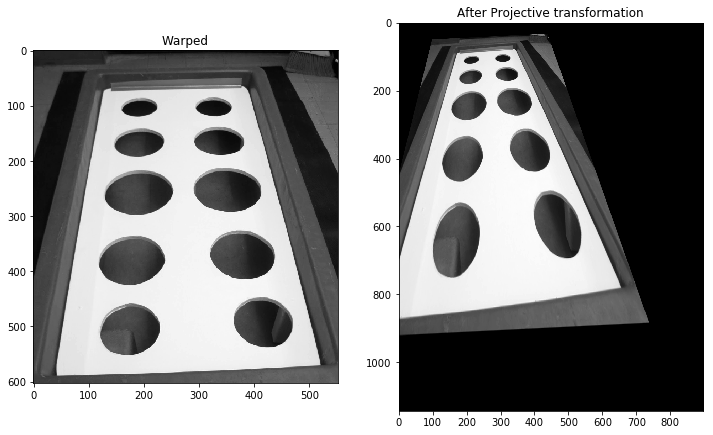

In [327]:
pts1 = np.reshape(pts, (4, 2))
pts2 = np.reshape(pts_warp, (4, 2))

M = cv2.getPerspectiveTransform(pts2, pts1)
# roi_corr = cv2.warpPerspective(img,M,)
# Round to reasonable precision
M = np.round(M, decimals =3)
# Get shape of initial image
rows, cols = roi.shape
# Apply transform and enlarge the output image as expected
roi_corr = cv2.warpPerspective(roi, M, (np.int(cols/M[0,0]), np.int(rows/M[1,1])))

fig, ax = plt.subplots(1,2, figsize = (12, 10))
ax[0].imshow(roi, cmap = "gray")
ax[0].set_title("Warped")
ax[1].imshow(roi_corr, cmap = "gray")
ax[1].set_title("After Projective transformation")
plt.show()

### Conclusion
Overall, the pure projection approach doesn't work that well as expected. This is due to the fact that the ellipses in the image appear to be tilted away from the middle (So that the transformatiom makes things actually even worse!). It is possible that this is an artifact of the camera and then we perhaps could correct for it by calibration.
It is also possible that having circular pattern will offer us with yet another possibility how to get the projection matrix from the image.

# Code graveyard:

In [ ]:
# loop over the contours individually
for (i, c) in enumerate(cnts):
    # if the contour is not sufficiently large, ignore it
    if cv2.contourArea(c) < 100:
        continue
        
    # compute the rotated bounding box of the contour, then
    # draw the contours
    box = cv2.minAreaRect(c)
    box = cv2.boxPoints(box)
    box = np.array(box, dtype="int")
    cv2.drawContours(image, [box], -1, (0, 255, 0), 2)

    # show the original coordinates
    print("Object #{}:".format(i + 1))
    print(box)
    # order the points in the contour such that they appear
    # in top-left, top-right, bottom-right, and bottom-left
    # order, then draw the outline of the rotated bounding
    # box
    rect = order_points(box)
        
    # show the re-ordered coordinates
    print(rect.astype("int"))
    print("")
    
    # loop over the original points and draw them
    for ((x, y), color) in zip(rect, colors):
        cv2.circle(image, (int(x), int(y)), 5, color, -1)

    # draw the object num at the top-left corner
    cv2.putText(image, "Object #{}".format(i + 1),
        (int(rect[0][0] - 15), int(rect[0][1] - 15)),
        cv2.FONT_HERSHEY_SIMPLEX, 0.55, (255, 255, 255), 2)
    
    cv2.imshow("Image", image)
    

In [ ]:
corners = cv2.cornerHarris(np.float32(gray), blockSize = 2, ksize = 3, k = 0.04)
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(9,9))
corners = cv2.dilate(corners, kernel = None, iterations=1)

# Threshold for an optimal value, it may vary depending on the image.
image[corners>0.01*corners.max()]=[0,0,255]

cv2.imshow('corners',image)
if cv2.waitKey(0) & 0xff == 27:
    cv2.destroyAllWindows()

In [ ]:
## Hough fails to find circles!
circles = cv2.HoughCircles(warped, method = cv2.HOUGH_GRADIENT, dp = 2, minDist = 10, param1 = 100,
                          param2 = 200, minRadius=40, maxRadius = 100)
warpedVis = warped.copy()

circles = np.uint16(np.around(circles))
for c in circles[0,:]:
    # draw the outer circle
    cv2.circle(warpedVis,(c[0],c[1]), radius = c[2], color = (0,255,0),thickness = 2)
    # draw the center of the circle
    cv2.circle(warpedVis,(c[0],c[1]), radius = 2,color = (0,0,255), thickness = 3)

cv2.imshow('detected circles',warpedVis)
# Esc kills the window
if cv2.waitKey(0) & 0xff == 27:
    cv2.destroyAllWindows()

In [ ]:
#cv2.approxPolyDP?
#cv2.polylines?
#cv2.arcLength?
#cv2.drawContours?